In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time

In [12]:
sns.set_theme(style="whitegrid", palette=sns.husl_palette(l=.4, n_colors=3), font_scale=1.8, context="paper")

# Scoring best models: `clinical`, `clinical+T1`, `T1`

In [5]:
df_scoring = pd.DataFrame()

bestModels = {"T1":"rfc", 
              "clinical":"gnb",
              "clinical_T1":"rfc"}
titles =  {"T1":"T1 sterols",
            "clinical":"clinical",
            "clinical_T1":"clinical + T1 sterols"}


for dataset, model in bestModels.items():
    print(dataset)
    if dataset == "T1": 
        timepoint = "12_sterol_discoveryValidation_corrected" 
        fs = "iterativeBoruta"
    else: timepoint = "12_uponAdmission"
    if dataset == "clinical_T1":
        fs = "clinical+bestSterols"
    if dataset == "clinical": 
        fs = "boruta"

    df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/prediction_cv_test_{model}.csv") 
    ''' Change name for plot '''
    df["varSet"] = titles[dataset]
    df_scoring = pd.concat([df_scoring, df], axis=0)

T1
clinical
clinical_T1


In [6]:
df_scoring

,precision,recall,f1,accuracy,model,auc,varSet
0,0.848684,0.962687,0.902098,0.829268,rfc,0.663682,T1 sterols
0,0.976000,0.910448,0.942085,0.908537,gnb,0.954726,clinical
0,0.926471,0.940299,0.933333,0.890244,rfc,0.949502,clinical + T1 sterols


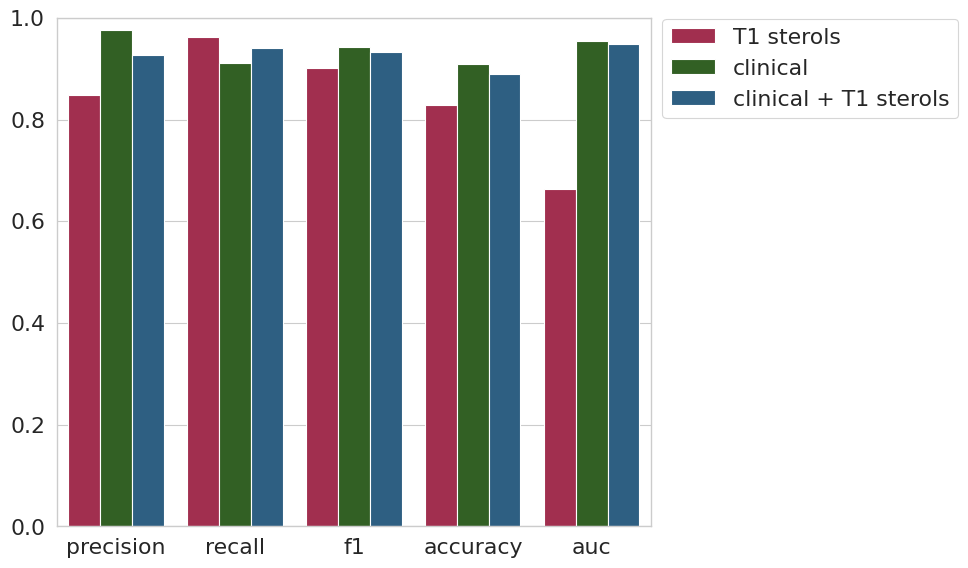

In [13]:
df_scoring_plot = df_scoring.drop("model", axis=1)
df_scoring_plot = df_scoring_plot.melt("varSet")

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_scoring_plot, x="variable", y="value", hue="varSet")
ax.legend(bbox_to_anchor=(1.0, 1.02))
ax.set_ylim(0,1)
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
fig.savefig("../figures/bestModelScoring.png", dpi=300)